In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import re
import os
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data
train_df = pd.read_csv('C:/Users/BATMAN/Desktop/1st project working copy/Train_data.csv')
test_df = pd.read_csv('C:/Users/BATMAN/Desktop/1st project working copy/Test_data.csv')
os.chdir("C:/Users/BATMAN/Desktop/1st project working copy")
final_submission = test_df

## Exlopratory Data Analysis (EDA) 

In [3]:
#Looking at data
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
#Missing value analysis
print(train_df.isnull().sum())
print('***************')
print(test_df.isnull().sum())

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64
***************
state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages     

#### From the above analysis we can see that there are no missing values in the data-set

In [5]:
# Dropping variables unessential for analysis.
train_df = train_df.drop(['state','area code','phone number'], axis =1)
test_df = test_df.drop(['state','area code','phone number'], axis =1)

In [6]:
#Replacing yes and no with 1 and 0/ true false with 1 and 0
#train
train_df['international plan'] = train_df['international plan'].replace(' yes','1')
train_df['international plan'] = train_df['international plan'].replace(' no','0')
train_df['voice mail plan'] = train_df['voice mail plan'].replace(' yes','1')
train_df['voice mail plan'] = train_df['voice mail plan'].replace(' no','0')
train_df['Churn'] = train_df['Churn'].replace(' True.','1')
train_df['Churn'] = train_df['Churn'].replace(' False.','0')
#test
test_df['international plan'] = test_df['international plan'].replace(' yes','1')
test_df['international plan'] = test_df['international plan'].replace(' no','0')
test_df['voice mail plan'] = test_df['voice mail plan'].replace(' yes','1')
test_df['voice mail plan'] = test_df['voice mail plan'].replace(' no','0')
test_df['Churn'] = test_df['Churn'].replace(' True.','1')
test_df['Churn'] = test_df['Churn'].replace(' False.','0')
##Converting into category
test_df['international plan'] = test_df['international plan'].astype('category')
test_df['international plan'] = test_df['international plan'].astype('category')
test_df['voice mail plan'] = test_df['voice mail plan'].astype('category')
test_df['voice mail plan'] = test_df['voice mail plan'].astype('category')
test_df['Churn'] = test_df['Churn'].astype('category')
test_df['Churn'] = test_df['Churn'].astype('category')

#### For international calls no = 0 yes = 1
#### For voice mail plan no = 0 yes = 1
#### For churn False = 0 True = 1

## Feature Selection

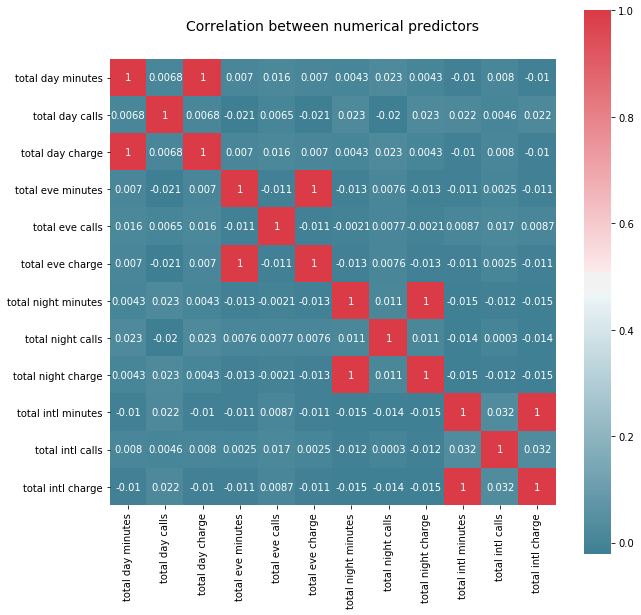

In [7]:
#Correlation alnalysis using heatmap
df_corr = train_df.iloc[:,4:16]
f, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation between numerical predictors',size=14,y=1.05)
corr = df_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap= sns.diverging_palette(220,10, as_cmap = True), square=True,
            annot = True,ax=ax)

###### From the above heat-map we can infer the following:
######        - total day minutes & total day charge are highly +vely correlated.
######        - total eve minutes & total eve charge are highly +vely correlated.
######        - total night minutes & total night charge are highly +vely correlated.
######        - total intl minutes & total intl charge are highly +vely correlated.

### Therefore we will drop the  total day charge, total eve charge,  total night charge i.e variables carrying redundant information  

In [8]:
train_df = train_df.drop(['total day minutes','total eve minutes','total night minutes','total intl minutes'], axis =1)
test_df = test_df.drop(['total day minutes','total eve minutes','total night minutes','total intl minutes'], axis =1)

In [9]:
cat_names = ['international plan','voice mail plan']

In [10]:
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_df['Churn'],train_df[i]))
    print(p)

international plan
2.49310770332e-50
voice mail plan
5.15063965904e-09


#### As p-value of both the categorical variables is < 0.05 therefor we will reject the null hypothesis and will consider both variables for further analysis.

### Outlier Analysis

In [11]:
#Fiding outliers and replacing with NA
cnames = ['total day calls', 'total day charge','total eve calls', 'total eve charge','total night calls', 'total night charge', 'total intl calls', 'total intl charge', 'number customer service calls']
for i in cnames:
    for j in range(len(train_df)):
        Q1 = train_df[i].quantile(0.25)
        Q3 = train_df[i].quantile(0.75)
        IQR = Q3 - Q1
        if (train_df[i].iloc[j] <= (Q1 - 1.5*IQR) or train_df[i].iloc[j] >= (Q3 + 1.5*IQR)):
            train_df[i].iloc[j] = np.nan
for k in cnames:
    for l in range(len(test_df)):
        Q1 = test_df[k].quantile(0.25)
        Q3 = test_df[k].quantile(0.75)
        IQR = Q3 - Q1
        if (test_df[k].iloc[l] <= (Q1 - 1.5*IQR) or test_df[k].iloc[l] >= (Q3 + 1.5*IQR)):
            test_df[k].iloc[l] = np.nan

C:\Users\BATMAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
#impute Nan with mean
cnames = ['total day calls', 'total day charge','total eve calls', 'total eve charge','total night calls', 'total night charge', 'total intl calls', 'total intl charge', 'number customer service calls']
for i in cnames:
    train_df[i] = train_df[i].fillna(train_df[i].mean())
    test_df[i] = test_df[i].fillna(test_df[i].mean())

## Feature Scaling

In [13]:
cnames = ['account length','number vmail messages','total day calls','total day charge','total eve calls','total eve charge','total night calls','total night charge','total intl calls','total intl charge','number customer service calls']
for i in cnames:
    print(i)
    train_df[i] = (train_df[i] - train_df[i].mean())/train_df[i].std()
    test_df[i] = (test_df[i] - test_df[i].mean())/test_df[i].std() 

account length
number vmail messages
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl calls
total intl charge
number customer service calls


# Model implementation

In [14]:
X_train = train_df.drop("Churn", axis=1)
Y_train = train_df["Churn"]
X_test  = test_df.drop("Churn", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((3333, 13), (3333,), (1667, 13))

In [15]:
# Gaussian Naive Bayes
NB_model = GaussianNB().fit(X_train,Y_train)
Y_pred = NB_model.predict(X_test)
NBtest_predict_prob = NB_model.predict_proba(X_test)
y1 = accuracy_score(test_df['Churn'],Y_pred)
print(y1*100)

85.8428314337


In [16]:
# Logistic Regression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
train_predict = logreg.predict(X_train)     #implement the model on train data for acuuracy
Y_pred = logreg.predict(X_test)      #implement the model on test data for acuurac
LRtest_predict_prob = logreg.predict_proba(X_test)
y2 = accuracy_score(test_df['Churn'],Y_pred)
print(y2*100)

87.2225554889


In [17]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
y3 = accuracy_score(test_df['Churn'],Y_pred)
print(y3*100)

86.9826034793


In [18]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Logistic Regression', 'KNN',],
    'Score': [y1,y2,y3]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,0.872226
2,KNN,0.869826
0,Gaussian Naive Bayes,0.858428


####  - As we have to calculate the churn score; therefore we will need an output in terms of probablity.
####  - Gaussian Naive Bayes and Logistic Regression gives probablity as output  
####  - As accuracy of Logictic regression is higher as compared to Naive Bayes we will use Logistic Regression.

In [19]:
final_submission = final_submission.drop(['state', 'account length', 'area code','international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'number customer service calls','Churn'], axis =1)

In [20]:
final_submission['Churn Score'] = pd.DataFrame(LRtest_predict_prob).iloc[:,1]

In [21]:
final_submission.to_csv('Churn_Score_python.csv', index=False)